Введите продолжительность сна (в часах): 8
Введите регулярность снов (от 1 до 7): 0
Ваше качество сна: 5.00


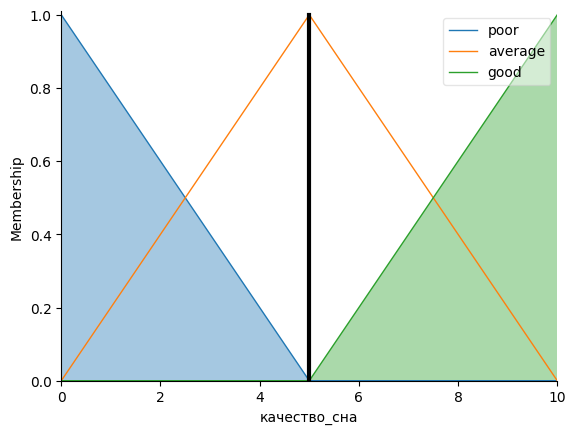

In [9]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Создание нечетких переменных и их множества
sleep_duration = ctrl.Antecedent(np.arange(0, 16, 1), 'продолжительность_сна')  # изменено до 16 часов
dream_regularity = ctrl.Antecedent(np.arange(1, 8, 1), 'регулярность_снов')  # изменено до 7 дней в неделе
sleep_quality = ctrl.Consequent(np.arange(0, 11, 1), 'качество_сна')

# Задаем форму нечетких множеств
sleep_duration.automf(5)  # автоматический подбор формы множеств для продолжительности сна
dream_regularity.automf(3)  # автоматический подбор формы множеств для регулярности снов
sleep_quality.automf(3)  # автоматический подбор формы множеств для качества сна

# Вводим логику для принятия решений
rule1 = ctrl.Rule(sleep_duration['poor'] | dream_regularity['poor'], sleep_quality['poor'])
rule2 = ctrl.Rule(sleep_duration['average'] & dream_regularity['average'], sleep_quality['average'])
rule3 = ctrl.Rule(sleep_duration['good'] | dream_regularity['good'], sleep_quality['good'])

# Собираем систему нечеткой логики
sleep_quality_simulation = ctrl.ControlSystem([rule1, rule2, rule3])
sleep_quality_simulation_simulation = ctrl.ControlSystemSimulation(sleep_quality_simulation)

# Вводим значения для нечетких переменных
sleep_duration_input = float(input('Введите продолжительность сна (в часах): ')) * 60  # переводим в минуты
dream_regularity_input = float(input('Введите регулярность снов (от 1 до 7): '))

# Процесс нечеткой логики
sleep_quality_simulation_simulation.input['продолжительность_сна'] = sleep_duration_input
sleep_quality_simulation_simulation.input['регулярность_снов'] = dream_regularity_input
sleep_quality_simulation_simulation.compute()

# Выводим результаты
print(f"Ваше качество сна: {sleep_quality_simulation_simulation.output['качество_сна']:.2f}")
sleep_quality.view(sim=sleep_quality_simulation_simulation)
plt.show()
